# In-Class Lecture 30-2 - Finite State Machines

Sometimes, using a direct set of <i>input to output</i> signals is insufficient to solve the problem. Consider the case of a vending machine. Vending machine use small <a href = "https://en.wikipedia.org/wiki/Embedded_system">embedded systems</a> to keep track of how much money you have dispensed, and when to vend specific items. For example, if we have paid <b>1.00</b> and we enter a quarter, there are different results if we are purchasing an item that is <b>1.75</b>, <b>1.25</b>, or <b>1.00</b>. Coding the result for each individual item takes up a lot of space on the limited embedded machine. We can do better.


We can write digital logic that acts like a graph called a <b>Finite State Machine</b>. A <b>Finite State Machine</b> consists of:<br />
<ol>
    <li>A set of states (represented as nodes)</li>
    <li>An initial state</li>
    <li>A set of transitions between states (represented by edges)</li>
    <li>A set of control input signals</li>
</ol>

An example of a simple mechanism that can be modeled by a state machine is a turnstile. A turnstile, used to control access to subways and amusement park rides, is a gate with three rotating arms at waist height, one across the entryway. Initially the arms are locked, blocking the entry, preventing patrons from passing through. Depositing a coin or token in a slot on the turnstile unlocks the arms, allowing a single customer to push through. After the customer passes through, the arms are locked again until another coin is inserted.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Turnstile_state_machine_colored.svg/330px-Turnstile_state_machine_colored.svg.png"></center>

The turnstile has two possible states: <b>Locked</b> and <b>Unlocked</b>. There are two possible inputs that affect its state: putting a coin in the slot (<b>coin</b>) and pushing the arm (<b>push</b>). In the locked state, pushing on the arm has no effect; no matter how many times the input <b>push</b> is given, it stays in the locked state. Putting a <b>coin</b> in <i>shifts the state</i> from Locked to Unlocked. In the unlocked state, putting additional coins in has no effect; that is, giving additional coin inputs does not change the state. However, a customer pushing through the arms, giving a push input, shifts the state back to Locked.

## Finite State Machine

Consider the image below: The format is <code>state_name / output</code>. For example, any time you reach the state <code>q0</code>, the output will be a <code>0</code>. Conversely, any time you reach the state <code>q3</code>, the output will be a <code>0</code>.

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/1-43.jpg" height=500 width=500>

<b>Start State</b>: <code>q0</code><br />
<b>Control Signals</b>: <code>{1, 1, 0, 1, 0, 0, 0, 1, 1}</code><br />

Here is how you would derive the results:
<ol>
    <li>The start state for this step is <code>q0</code>, so the output is <code>0</code> and the control input is <code>1</code>. The edge takes to <font color="red"><code>q2</code></font></li>
    <li>The start state for this step is <code>q2</code>, so the output is <code>0</code>, and the control input is <code>1</code>. The edge takes to <code>q2</code></li>
    <li>The start state for this step is <code>q2</code>, so the output is <code>0</code>, and the control input is <code>0</code>. The edge takes to <code>q4</code></li>
    <li>The start state for this step is <code>q4</code>, so the output is <code>1</code>, and the control input is <code>1</code>. The edge takes to <code>q3</code></li>
    <li>The start state for this step is <code>q3</code>, so the output is <code>1</code>, and the control input is <code>0</code>. The edge takes to <code>q4</code></li>
    <li>The start state for this step is <code>q4</code>, so the output is <code>1</code>, and the control input is <code>0</code>. The edge takes to <code>q1</code></li>
    <li>The start state for this step is <code>q1</code>, so the output is <code>0</code>, and the control input is <code>0</code>. The edge takes to <code>q1</code></li>
    <li>The start state for this step is <code>q1</code>, so the output is <code>0</code>, and the control input is <code>1</code>. The edge takes to <code>q3</code></li>
        <li>The start state for this step is <code>q3</code>, so the output is <code>1</code>, and the control input is <code>1</code>. The edge takes to <code>q2</code></li>
</ol>

The solution is <code>{0, 0, 0, 1, 1, 1, 0, 0, 1}</code>

Solution Table:

| Start State | Output | Control | Next State |
|---|---|---|---|
|q0|<font color="red">0</font>|1|q2|
|q2|<font color="red">0</font>|1|q2|
|q2|<font color="red">0</font>|0|q4|
|q4|<font color="red">1</font>|1|q3|
|q3|<font color="red">1</font>|0|q4|
|q4|<font color="red">1</font>|0|q1|
|q1|<font color="red">0</font>|0|q1|
|q1|<font color="red">0</font>|1|q3|
|q3|<font color="red">1</font>|1|q2|

### Finite State Machine Example 1

Given the following Mealy Machine, start state, and control signals, state the output signals and next states:

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/1-43.jpg" height=500 width=500>

<b>Start State</b>: <code>q0</code><br />
<b>Control Signals</b>: <code>{0, 1, 1, 0, 0, 1, 0, 1, 0}</code><br />

### Finite State Machine Example 2

Given the following Mealy Machine, start state, and control signals, state the output signals and next states:

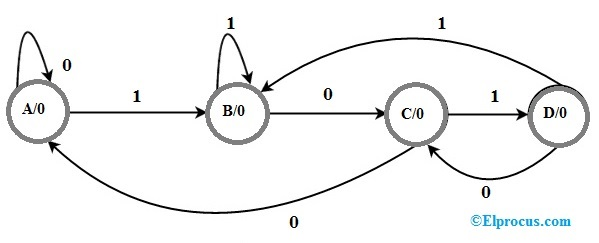

<b>Start State</b>: <code>A</code><br />
<b>Control Signals</b>: <code>{1, 0, 0, 0, 1, 1, 0, 1, 1}</code><br />

## Code Example

Let's look at the code for Moore.cpp

    wget https://raw.githubusercontent.com/mmorri22/cse20133/main/inclass/lec30/Moore.cpp
    
Here is the C++ implementation of an Example Finite State Machine

	char* outputVec = new char[ SIZE ];
	
	while( input_val != 2 && iter < 25 ){
		
		std::cout << "Input 0 or 1 for the next state (or 2 to end): ";

		std::cin >> input_val;
		
		if( input_val == 2 ){
			break;
		}
		
		switch( state ){
			
			case 0:	// q1 is 0
				
				if( input_val == 0 ){
					state = 1;
					outputVec[iter] = '2';
				}
				else{
					state = 0;
					outputVec[iter] = '1';
				}
				break;
			
			case 1:	// q2 is 1
				
				if( input_val == 0 ){
					state = 2;
					outputVec[iter] =  '3';
				}
				else{
					state = 0;
					outputVec[iter] = '1';
				}
				break;
				
			case 2:	// q3 is 2
				
				if( input_val == 0 ){
					state = 1;
					outputVec[iter] = '2';
				}
				else{
					state = 0;
					outputVec[iter] =  '1';
				}
				break;
			
			default:
				fprintf( stdout, "Invalid state\n" );
				return EXIT_FAILURE;
				break;
			
		}
		
		++iter;
	}
	
	/* Print the Results */
	printOutput( outputVec );

	/* Delete the dynamic memory */
	delete [] outputVec;

## Example Output

    > g++ -O2 -std=c++2a -Wall -Wextra -Wconversion -Werror Moore.cpp -o Moore
    > ./Moore
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 0
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 0
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 0
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 1
    Input 0 or 1 for the next state (or 2 to end): 0
    Input 0 or 1 for the next state (or 2 to end): 0
    Input 0 or 1 for the next state (or 2 to end): 2
    121112121123
    > rm Moore